In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

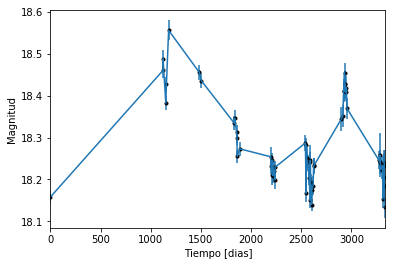

In [2]:
data = np.genfromtxt('LC_23309_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

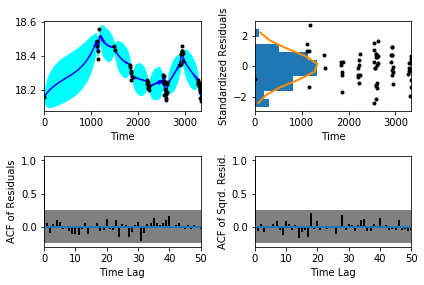

In [5]:
sample.assess_fit()

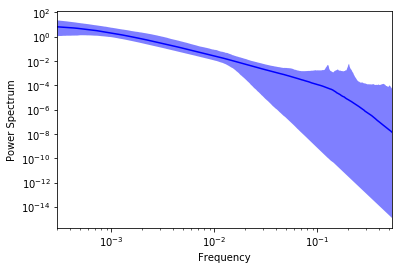

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.0388746,'Medida del nivel de ruido')

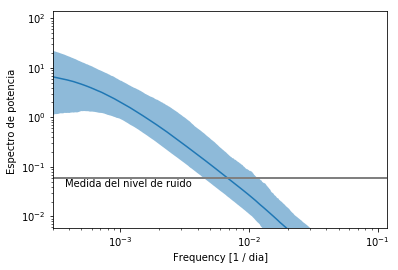

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

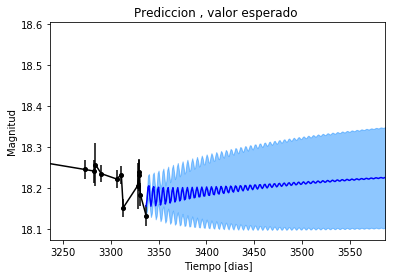

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

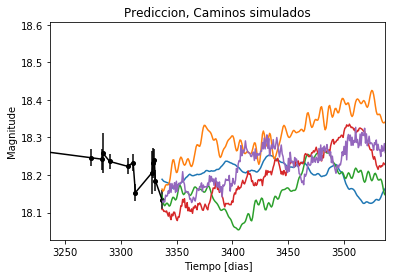

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


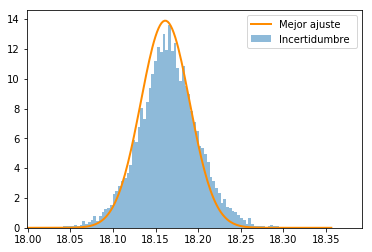

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

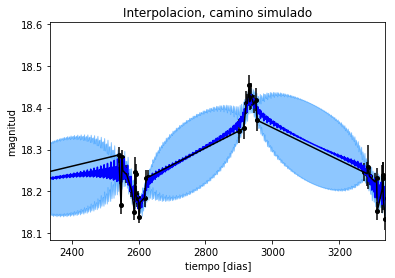

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

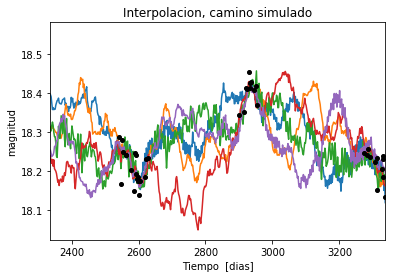

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 551.38128114
Median: 0.0137235489646
Standard deviation: 0.195732216594
68% credibility interval: [ 0.00169929  0.15661962]
95% credibility interval: [  4.58194608e-04   7.92362251e-01]
99% credibility interval: [  3.37800054e-04   1.00925012e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1079.60135213
Median: 0.00748723290931
Standard deviation: 0.116619864896
68% credibility interval: [ 0.00083755  0.05569022]
95% credibility interval: [ 0.00036789  0.36731719]
99% credibility interval: [  3.13320839e-04   9.46114009e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 592.878003079
Median: 0.0871198983574
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 362.939014683
Median: 136.865106368
Standard deviation: 2.13271935473
68% credibility interval: [ 134.73208082  138.76157632]
95% credibility interval: [ 132.03866733  140.51513875]
99% credibility interval: [ 129.79239938  141.2967207 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 629.528079649
Median: 1.13074883537
Standard deviation: 2.67636475241
68% credibility interval: [ 0.20362021  4.90718558]
95% credibility interval: [ 0.04373283  9.39233111]
99% credibility interval: [  0.01756599  13.46842676]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 823.001367346
Median: 1.90141937042
Standard deviation: 13.9734571778
68% credibility interval: [  0.1630075   19.19090665]
95% credibility interval: [  8.02744735e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12737.4125996
Median: 1.29245860625e-26
Standard deviation: 5.29832815248e+65
68% credibility interval: [  1.95625129e-48   4.09241983e-01]
95% credibility interval: [  8.03806347e-79   8.59236493e+35]
99% credibility interval: [  2.02277042e-93   5.64951784e+38]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1056.71400171
Median: 18.2993406601
Standard deviation: 0.0566849929302
68% credibility interval: [ 18.24670213  18.34771504]
95% credibility interval: [ 18.18311057  18.40796911]
99% credibility interval: [ 18.11384086  18.46485281]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 274.160719063
Median: 0.156500326153
Standard deviation: 0.287116789369
68% credibility interval: [ 0.          0.59852186]
95% credibility interval: [ 0.          0.96205351]
99% credibility interval: [ 0.          1.05131728]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 274.160719063
Median: 0.156500326153
Standard deviation: 0.287116789369
68% credibility interval: [ 0.          0.59852186]
95% credibility interval: [ 0.          0.96205351]
99% credibility interval: [ 0.          1.05131728]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1194.98621008
Median: 0.0
Standard deviation: 0.000314503252824
68% cred

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 362.939014683
Median: 136.865106368
Standard deviation: 2.13271935473
68% credibility interval: [ 134.73208082  138.76157632]
95% credibility interval: [ 132.03866733  140.51513875]
99% credibility interval: [ 129.79239938  141.2967207 ]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1442.28873578
Median: 0.0156057196391
Standard deviation: 0.010513777608
68% credibility interval: [ 0.00995     0.02584061]
95% credibility interval: [ 0.00710558  0.04366082]
99% credibility interval: [ 0.00570095  0.06804868]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 407.785847614
Median: 1.20840514474
Standard deviation: 0.246199602155
68% credibility interval: [ 0.98065273  1.48150654]
95% credibility interval: [ 0.80088386  1.75942807]
99% credibility interval: [ 0.71932276  1.92369744]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 807.977707988
Median: 0.00647829467658
Standard deviation: 0.368480453991
68% credibility interval: [  8.60691397e-06   1.15785350e-01]
95% credibility interval: [  1.31476207e-38   1.08680911e+00]
99% credibility interval: [  3.91811791e-42   2.46414287e+00]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 551.38128114
Median: (-0.0862276012169-0.607933171038j)
Standard deviation: 2.18332463586
68% credibility interval: [-0.98407007-1.10829213j -0.01067694-0.1085545j ]
95% credibility interval: [ -4.97855885e+00+0.j          -2.87892163e-03-0.06585499j]
99% credibility interval: [ -6.34130556e+00+0.j          -2.12246034e-03-0.05325164j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1079.60135213
Median: (-0.0470436718072+0.627648717805j)
Standard deviation: 1.9471412201
68% credibility interval: [-0.34991197+4.29969256j -0.00526250+0.j        ]
95% credibility interval: [-2.30792195+0.11218726j -0.00231155+0.j        ]
99% credibility interval: [ -5.94460964e+00+5.59056216j  -1.96865289e-03+0.j        ]
Posterior summ